In [1]:
import os
import yaml
from pathlib import Path
from PIL import Image
from scipy import linalg

import numpy as np
import skimage
import matplotlib.pyplot as plt
from openslide import OpenSlide

from src.utils import *
from src.wsi_reader import WSIReader

In [2]:
config = load_config()
config

{'dataset_path': '/Users/cmkim/workspace/datasets/TIGER/'}

In [3]:
rgb = WSIReader(
    path=Path(config["dataset_path"]) / "wsibulk/images" / "119S.tif"
).read_array(
    level=32
)

## optical density

In [4]:
transmission = skimage.util.img_as_float(rgb, force_copy=True)
np.maximum(transmission, 1e-6, out=transmission)

array([[[0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        ...,
        [0.90980392, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922]],

       [[0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        ...,
        [0.90980392, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922]],

       [[0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        [0.90980392, 0.89019608, 0.90588235],
        ...,
        [0.90980392, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922],
        [0.90196078, 0.89411765, 0.89803922]],

       ...,

       [[0.91764706, 0.90196078, 0.90588235],
        [0.91764706, 0.90196078, 0.90588235],
        [0.91764706, 0

In [5]:
od = np.log(transmission) / np.log(1e-6)
od

array([[[0.00684203, 0.00841905, 0.0071547 ],
        [0.00684203, 0.00841905, 0.0071547 ],
        [0.00684203, 0.00841905, 0.0071547 ],
        ...,
        [0.00684203, 0.00810089, 0.00778412],
        [0.00746872, 0.00810089, 0.00778412],
        [0.00746872, 0.00810089, 0.00778412]],

       [[0.00684203, 0.00841905, 0.0071547 ],
        [0.00684203, 0.00841905, 0.0071547 ],
        [0.00684203, 0.00841905, 0.0071547 ],
        ...,
        [0.00684203, 0.00810089, 0.00778412],
        [0.00746872, 0.00810089, 0.00778412],
        [0.00746872, 0.00810089, 0.00778412]],

       [[0.00684203, 0.00841905, 0.0071547 ],
        [0.00684203, 0.00841905, 0.0071547 ],
        [0.00684203, 0.00841905, 0.0071547 ],
        ...,
        [0.00684203, 0.00810089, 0.00778412],
        [0.00746872, 0.00810089, 0.00778412],
        [0.00746872, 0.00810089, 0.00778412]],

       ...,

       [[0.00622072, 0.00746872, 0.0071547 ],
        [0.00622072, 0.00746872, 0.0071547 ],
        [0.00622072, 0

## color deconvolution

In [6]:
stain_matrix = StainConcentrationMatrix.hed()

In [7]:
stains = od @ linalg.inv(stain_matrix)
# np.maximum(stains, 0, out=stains)

In [8]:
null = np.zeros_like(stains[:, :, 0])

In [9]:
hematoxylin = skimage.color.hed2rgb(np.stack((stains[:, :, 0], null, null), axis=-1))

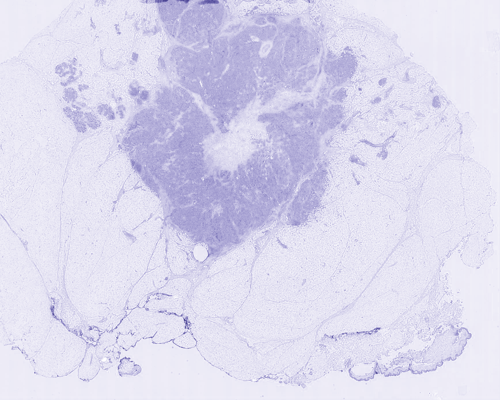

In [10]:
formatted = (hematoxylin * 255 / np.max(hematoxylin)).astype('uint8')
img = Image.fromarray(formatted).resize((500, 400))
img

In [11]:
eosin = skimage.color.hed2rgb(np.stack((null, stains[:, :, 1], null), axis=-1))

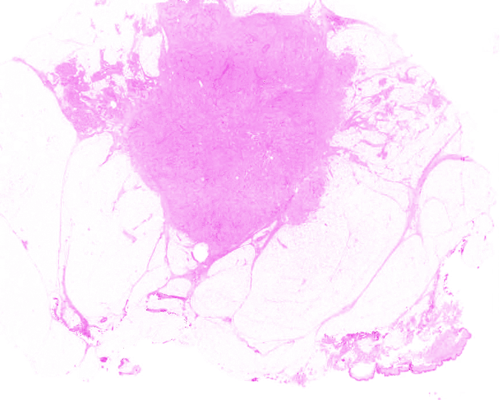

In [12]:
formatted = (eosin * 255 / np.max(eosin)).astype('uint8')
img = Image.fromarray(formatted).resize((500, 400))
img

In [13]:
dab = skimage.color.hed2rgb(np.stack((null, null, stains[:, :, 2]), axis=-1))

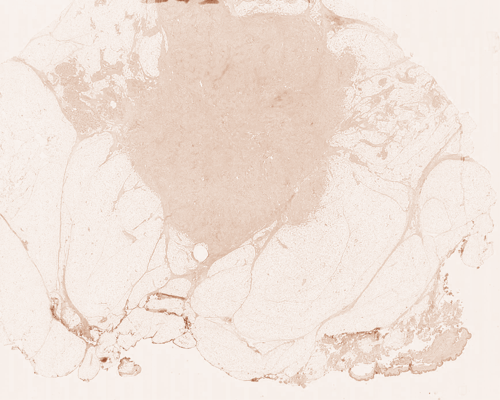

In [14]:
formatted = (dab * 255 / np.max(dab)).astype('uint8')
img = Image.fromarray(formatted).resize((500, 400))
img

## Recover

In [15]:
stains

array([[[ 0.00798515, -0.00085486,  0.00639266],
        [ 0.00798515, -0.00085486,  0.00639266],
        [ 0.00798515, -0.00085486,  0.00639266],
        ...,
        [ 0.00763391, -0.0015198 ,  0.00742319],
        [ 0.00881215, -0.0021573 ,  0.00707521],
        [ 0.00881215, -0.0021573 ,  0.00707521]],

       [[ 0.00798515, -0.00085486,  0.00639266],
        [ 0.00798515, -0.00085486,  0.00639266],
        [ 0.00798515, -0.00085486,  0.00639266],
        ...,
        [ 0.00763391, -0.0015198 ,  0.00742319],
        [ 0.00881215, -0.0021573 ,  0.00707521],
        [ 0.00881215, -0.0021573 ,  0.00707521]],

       [[ 0.00798515, -0.00085486,  0.00639266],
        [ 0.00798515, -0.00085486,  0.00639266],
        [ 0.00798515, -0.00085486,  0.00639266],
        ...,
        [ 0.00763391, -0.0015198 ,  0.00742319],
        [ 0.00881215, -0.0021573 ,  0.00707521],
        [ 0.00881215, -0.0021573 ,  0.00707521]],

       ...,

       [[ 0.00688698, -0.00130171,  0.00685787],
        [ 0

In [16]:
rgb_adj = np.exp(-(stains * -np.log(1e-6)) @ stain_matrix)
rgb_adj = np.clip(rgb_adj, a_min=0, a_max=1)

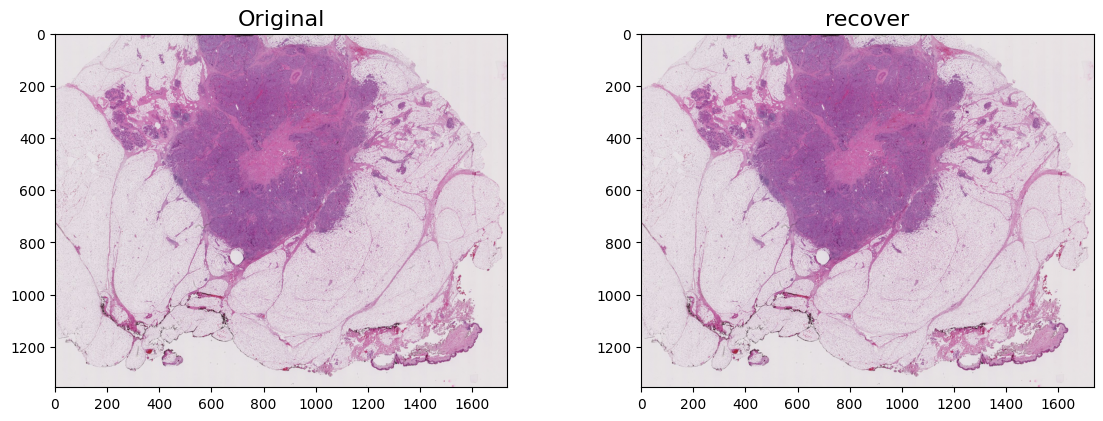

In [17]:
fontdict={
    "fontsize": 16
}

fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(221)
ax.imshow(transmission)
ax.set_title(label="Original", fontdict=fontdict)

ax = fig.add_subplot(222)
ax.imshow(rgb_adj)
ax.set_title(label="recover", fontdict=fontdict)

fig.tight_layout()
plt.show()